In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

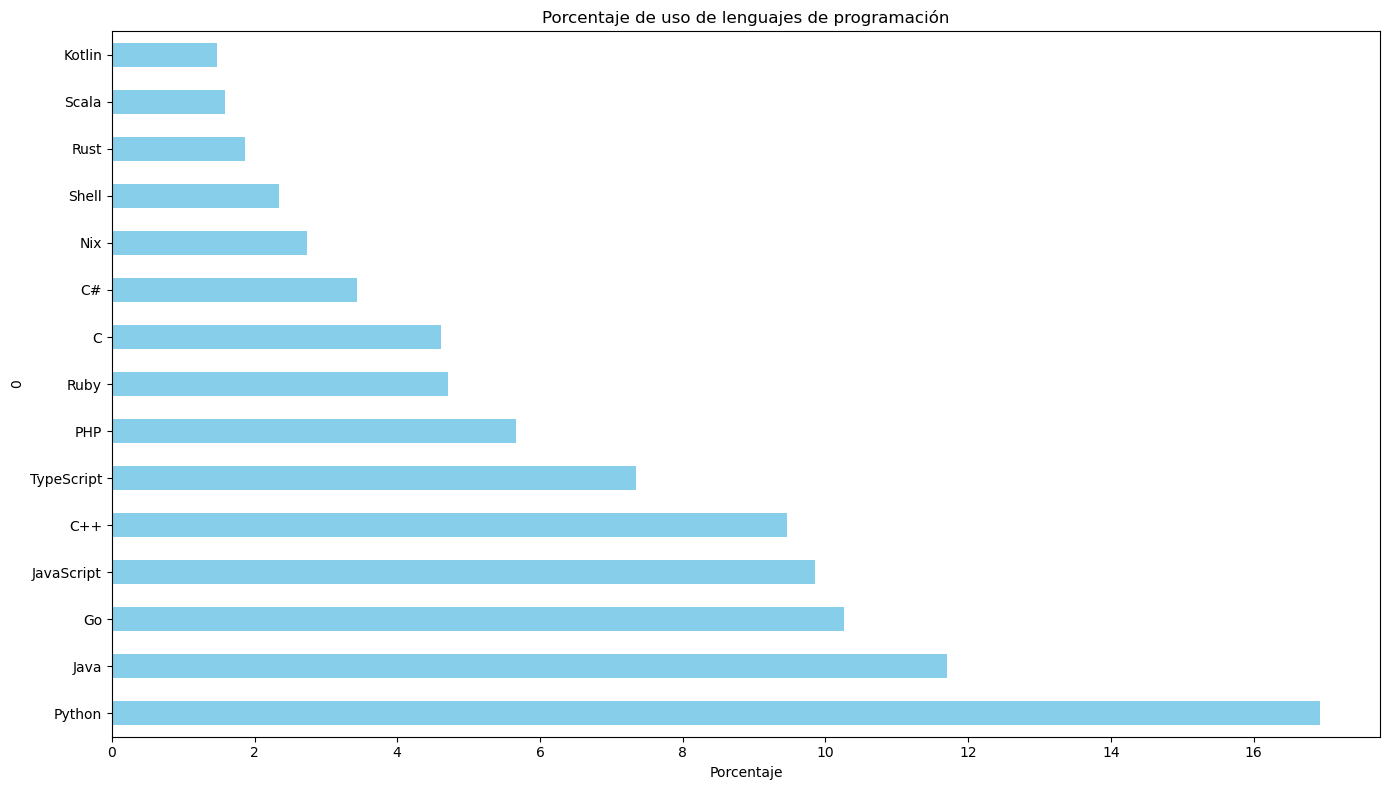

In [6]:
# Leer el archivo CSV usando el delimitador ';'
df = pd.read_csv('SextaTendencia.csv', delimiter=';', header=None, engine='python')

# La primera fila debería tener los nombres de las columnas (Lenguajes de programación)
column_names = df.iloc[0].str.replace('"', '').str.strip()

# La segunda fila contiene los valores
values = df.iloc[1].str.replace('"', '').str.strip()

# Limpiar los valores para extraer solo los números
def clean_percentage(value):
    # Utilizar expresiones regulares para extraer solo números y puntos
    match = re.search(r'([\d.]+)%', value)
    return float(match.group(1)) if match else None

# Aplicar la limpieza a los valores
cleaned_values = values.apply(clean_percentage)

# Crear un DataFrame con los valores limpios
data = pd.DataFrame([cleaned_values.values], columns=column_names)

# Cambiar el índice para que los lenguajes de programación aparezcan en el gráfico
data = data.T  # Transponer la tabla para que las columnas sean filas
data.columns = ['Porcentaje']  # Asignar un nombre a la columna de porcentaje

# Crear el gráfico
data.plot(kind='barh', figsize=(14, 8), color='skyblue', legend=False)  # Usar un solo color
plt.title('Porcentaje de uso de lenguajes de programación')
plt.xlabel('Porcentaje')
plt.tight_layout()
plt.show()